<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-Notebook" data-toc-modified-id="Prepare-Notebook-1">Prepare Notebook</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-2">Load the data</a></span></li><li><span><a href="#Detrend-Data" data-toc-modified-id="Detrend-Data-3">Detrend Data</a></span></li><li><span><a href="#Plot-Data" data-toc-modified-id="Plot-Data-4">Plot Data</a></span></li></ul></div>

## Prepare Notebook
[Back to Top](#top)

In [6]:
from __future__ import print_function
import cdms2
import genutil
import vcs
import requests
import os

filename = 'tas_Amon_IPSL-CM5A-LR_1pctCO2_r1i1p1_185001-198912.nc'
if not os.path.exists(filename):
    r = requests.get("https://cdat.llnl.gov/cdat/sample_data/notebooks/{}".format(filename), stream=True)
    with open(filename,"wb") as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:  # filter local_filename keep-alive new chunks
                f.write(chunk)


## Load the data
[Back to Top](#top)

In [8]:
tas_file = cdms2.open(filename)

tas = tas_file("tas")
print("Shape: tas {}".format(tas.shape))

Shape: tas (1680, 13, 16)


## Detrend Data
[Back to Top](#top)

First we will compute the trend, other `time` note that the index of time can be anything, `genutil` will determine its index.

After computation we lose the time axis, also note the uniots, based on units on time axis

In [9]:
coeff, intercept = genutil.statistics.linearregression(tas, axis="t")

print("Shapes: coeff {}, intercept {}".format(coeff.shape, intercept.shape))
print("Units: {}".format(coeff.units))

Shapes: coeff (13, 16), intercept (13, 16)
Units: K per days since 1850-01-01 00:00:00


Now we need to remove the trend (detrend)

In [10]:
detrended = tas - tas*coeff

## Plot Data
[Back to Top](#top)

For clarity we will plot the time series only

In [14]:
ts = genutil.averager(tas, axis='xy')
ts_detrended = genutil.averager(detrended, axis="xy")

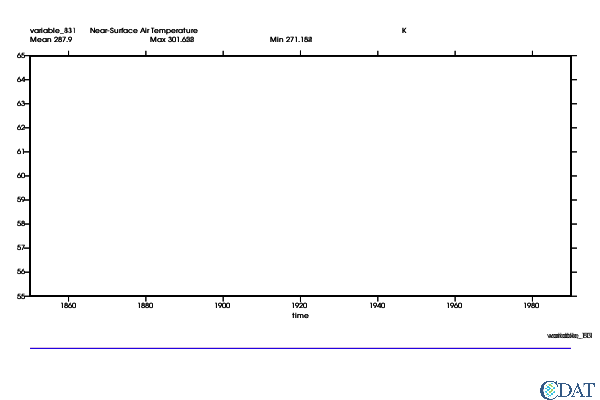

In [15]:
x = vcs.init(bg=True,geometry=(600,400))
red = vcs.create1d()
# Set color
red.linecolor = "red"
# Set y domain
red.datawc_y1 = 55
red.datawc_y2 = 65
# create a copy for blue line
blue = vcs.create1d(source=red)
# reset the color
blue.linecolor = "blue"
x.plot(ts, red)
x.plot(ts_detrended, blue)
#x.clear()
#x.plot(coeff)

In [16]:
f = cdms2.open("https://vesg.ipsl.upmc.fr/thredds/dodsC/cmip5/output1/IPSL/IPSL-CM5A-LR/1pctCO2/mon/atmos/Amon/r1i1p1/v20110427/tas/tas_Amon_IPSL-CM5A-LR_1pctCO2_r1i1p1_185001-198912.nc")

CDMSError: Error in DODS open of: https://vesg.ipsl.upmc.fr/thredds/dodsC/cmip5/output1/IPSL/IPSL-CM5A-LR/1pctCO2/mon/atmos/Amon/r1i1p1/v20110427/tas/tas_Amon_IPSL-CM5A-LR_1pctCO2_r1i1p1_185001-198912.nc